# Childhood Vaccination Data - Demographics

This data is from the [nychealth github](https://github.com/nychealth/immunization-data).

This repository contains data on routine immunizations administered to New York City (NYC) children ages 0 to 18 years and reported to the [Citywide Immunization Registry](https://www.nyc.gov/site/doh/providers/reporting-and-services/citywide-immunization-registry-cir.page) (CIR). These data are available on the NYC Health Department’s [Childhood Vaccination Data Explorer](https://www.nyc.gov/site/doh/data/data-sets/childhood-vaccination-data.page).

In [1]:
import pandas as pd
import numpy as np
import warnings, os
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Main_Routine_Vaccine_Demo.csv', na_values=['NaN'])

df.head()

,DATE_CREATED,AGE_GROUP,DOB_RANGE,VACCINE_GROUP,DOSES,YEAR_COVERAGE,QUARTER,RACE_ETHNICITY,POP_DENOMINATOR_YEAR,POP_DENOMINATOR,COUNT_PEOPLE_VAC,PERC_VAC
0,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,"American Indian, non-Hispanic",2024 Vintage Estimates for 2023,192.85,122.0,63.0
1,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,"Asian, non-Hispanic",2024 Vintage Estimates for 2023,11158.76,10223.0,92.0
2,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,"Black, non-Hispanic",2024 Vintage Estimates for 2023,17279.96,10219.0,59.0
3,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,Hispanic/Latino,2024 Vintage Estimates for 2023,28409.10,20366.0,72.0
4,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,"Native Hawaiian/PI, non-Hispanic",2024 Vintage Estimates for 2023,42.41,39.0,92.0


In [3]:
df.shape

(1872, 12)

In [4]:
df.dtypes

DATE_CREATED             object
AGE_GROUP                object
DOB_RANGE                object
VACCINE_GROUP            object
DOSES                    object
YEAR_COVERAGE            object
QUARTER                  object
RACE_ETHNICITY           object
POP_DENOMINATOR_YEAR     object
POP_DENOMINATOR         float64
COUNT_PEOPLE_VAC        float64
PERC_VAC                float64
dtype: object

In [5]:
# drop NaN values
df = df.dropna()

## Questions
- What race/ethnicity has the highest average percent of children vaccinated?
- Does the average percent of children vaccinated differ among age groups?
- What vaccine has the highest average percent of children vaccined? The lowest?

In [6]:
df.groupby('RACE_ETHNICITY')['PERC_VAC'].mean().sort_values(ascending=False).to_frame()

,PERC_VAC
RACE_ETHNICITY,
"Asian, non-Hispanic",84.903846
"Native Hawaiian/PI, non-Hispanic",79.201923
Hispanic/Latino,68.081731
"Black, non-Hispanic",61.725962
"White, non-Hispanic",53.475962
"American Indian, non-Hispanic",51.149038
"Two or more races, non-Hispanic",12.673171


<Axes: ylabel='RACE_ETHNICITY'>

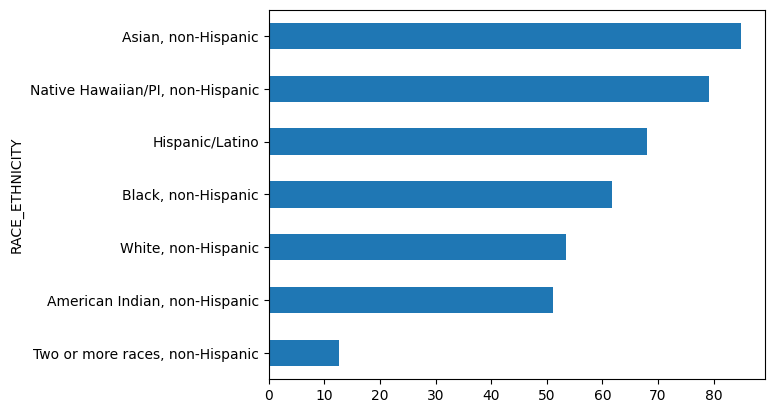

In [7]:
df.groupby('RACE_ETHNICITY')['PERC_VAC'].mean().sort_values(ascending=True).plot.barh()

In [17]:
race_perc = df.groupby('RACE_ETHNICITY')['PERC_VAC'].mean().to_frame()

In [18]:
race_perc = df.groupby('RACE_ETHNICITY')['PERC_VAC'].mean().to_frame()

race_perc.rename(columns={'PERC_VAC': 'Percentage vaccinated'}, inplace=True)

race_perc

,Percentage vaccinated
RACE_ETHNICITY,
"American Indian, non-Hispanic",51.149038
"Asian, non-Hispanic",84.903846
"Black, non-Hispanic",61.725962
Hispanic/Latino,68.081731
"Native Hawaiian/PI, non-Hispanic",79.201923
"Two or more races, non-Hispanic",12.673171
"White, non-Hispanic",53.475962


In [19]:
race_perc.to_csv('race-vaccinated.csv')

In [8]:
df.groupby('RACE_ETHNICITY')['PERC_VAC'].median().sort_values(ascending=False).to_frame()

,PERC_VAC
RACE_ETHNICITY,
"Native Hawaiian/PI, non-Hispanic",95.0
"Asian, non-Hispanic",92.0
Hispanic/Latino,71.0
"Black, non-Hispanic",67.0
"White, non-Hispanic",57.0
"American Indian, non-Hispanic",47.0
"Two or more races, non-Hispanic",13.0


In [9]:
df.groupby('AGE_GROUP')['PERC_VAC'].mean().sort_values(ascending=False).to_frame()

,PERC_VAC
AGE_GROUP,
24 - 35 months,65.251116
13 - 17 years,53.508929
13 years,49.623853
6 months - 4 years,46.482143
5 - 12 years,39.535714


<Axes: ylabel='AGE_GROUP'>

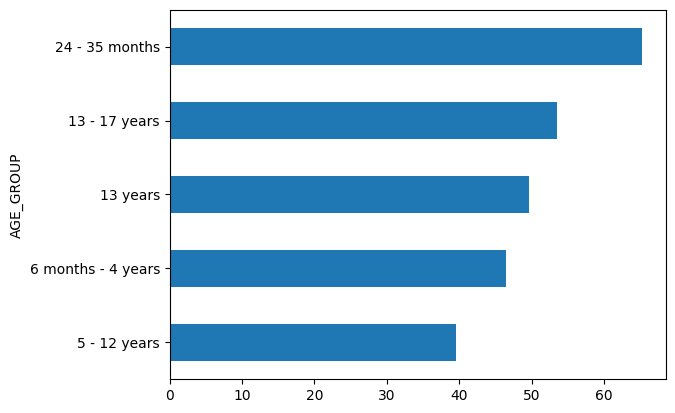

In [10]:
df.groupby('AGE_GROUP')['PERC_VAC'].mean().sort_values(ascending=True).plot.barh()

In [11]:
df.groupby('VACCINE_GROUP')['PERC_VAC'].mean().sort_values(ascending=False).to_frame()

,PERC_VAC
VACCINE_GROUP,
Polio,72.803571
MMR,72.053571
HepB,71.419643
Varicella,71.410714
DTaP,62.294643
Hib,61.464286
PCV,58.660714
HPV,58.009050
4313314,51.901786


<Axes: ylabel='VACCINE_GROUP'>

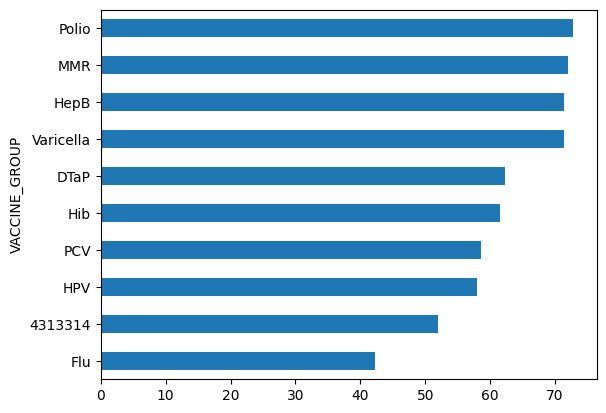

In [12]:
df.groupby('VACCINE_GROUP')['PERC_VAC'].mean().sort_values(ascending=True).plot.barh()

In [13]:
polio = df[df['VACCINE_GROUP'] == 'Polio']
polio.groupby('RACE_ETHNICITY')['PERC_VAC'].mean().sort_values(ascending=False).to_frame()

,PERC_VAC
RACE_ETHNICITY,
"Asian, non-Hispanic",98.5625
Hispanic/Latino,86.9375
"Black, non-Hispanic",85.1875
"White, non-Hispanic",82.0625
"Native Hawaiian/PI, non-Hispanic",82.0000
"American Indian, non-Hispanic",54.7500
"Two or more races, non-Hispanic",20.1250


In [14]:
flu = df[df['VACCINE_GROUP'] == 'Flu']
flu.groupby('RACE_ETHNICITY')['PERC_VAC'].mean().sort_values(ascending=False).to_frame()

,PERC_VAC
RACE_ETHNICITY,
"Native Hawaiian/PI, non-Hispanic",72.625000
"Asian, non-Hispanic",67.520833
Hispanic/Latino,41.958333
"American Indian, non-Hispanic",41.625000
"White, non-Hispanic",34.229167
"Black, non-Hispanic",31.645833
"Two or more races, non-Hispanic",6.416667
